# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Mudita Indah Paramitha
- **Email:** muditaindah@gmail.com
- **ID Dicoding:** muditaindah

## Menentukan Pertanyaan Bisnis



```
# Ini diformat sebagai kode
```

- Bagaimana hasil emisi dari berbagai jenis polutan dalam satu daerah selama periode tertentu?
- Bagaimana perbandingan emisi berbagai polutan di beberapa daerah selama waktu tertentu? Apakah terdapat daerah yang secara konsisten memiliki kualitas udara yang lebih baik atau lebih buruk dibandingkan daerah lain?

## Import Semua Packages/Library yang Digunakan

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import geopandas as gpd

## Data Wrangling

### Gathering Data

In [376]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [377]:
lokasi_data = '/content/drive/MyDrive/Colab_Notebooks/Air-quality-dataset.zip'
with zipfile.ZipFile(lokasi_data, 'r') as zip_final:
  zip_final.extractall('/content/drive/MyDrive/Colab_Notebooks/Kualitas-Udara-Final')
kombinasi_data = pd.DataFrame()
folder_path = '/content/drive/MyDrive/Colab_Notebooks/Kualitas-Udara-Final/PRSA_Data_20130301-20170228'
file_data = os.listdir('/content/drive/MyDrive/Colab_Notebooks/Kualitas-Udara-Final/PRSA_Data_20130301-20170228')
kumpulan_csv = (f for f in file_data if f.endswith('.csv'))
df_list = []
for csv in kumpulan_csv:
  file_path = os.path.join(folder_path, csv)
  df = pd.read_csv(file_path)
  df_list.append(df)
big_df = pd.concat(df_list, ignore_index=True)
big_df.to_csv(os.path.join(folder_path, 'data_final.csv'), index=False)
big_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Terdapat 12 file CSV yang berisi rincian data kualitas udara pada daerah yang berbeda berdasarkan waktu, temperatur, jenis polutan, dan lain-lain.
- Cara membedakan lokasi dari suatu data terlihat pada kolom "station"

### Assessing Data

In [378]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7153056 entries, 0 to 7153055
Data columns (total 18 columns):
 #   Column   Dtype  
---  ------   -----  
 0   No       int64  
 1   year     int64  
 2   month    int64  
 3   day      int64  
 4   hour     int64  
 5   PM2.5    float64
 6   PM10     float64
 7   SO2      float64
 8   NO2      float64
 9   CO       float64
 10  O3       float64
 11  TEMP     float64
 12  PRES     float64
 13  DEWP     float64
 14  RAIN     float64
 15  wd       object 
 16  WSPM     float64
 17  station  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 982.3+ MB


In [379]:
big_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,148563
PM10,109633
SO2,153357
NO2,205972
CO,351917


In [380]:
print("Jumlah duplikasi: ", big_df.duplicated().sum())

Jumlah duplikasi:  6732288


In [381]:
big_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,7.153056e+06,7.153056e+06,7.153056e+06,7.153056e+06,7.153056e+06,7.004493e+06,7.043423e+06,6.999699e+06,6.947084e+06,6.801139e+06,6.927347e+06,7.146290e+06,7.146375e+06,7.146205e+06,7.146426e+06,7.147650e+06
mean,1.753250e+04,2.014663e+03,6.522930e+00,1.572964e+01,1.150000e+01,7.979343e+01,1.046026e+02,1.583083e+01,5.063859e+01,1.230766e+03,5.737227e+01,1.353898e+01,1.010747e+03,2.490822e+00,6.447578e-02,1.729711e+00
std,1.012211e+04,1.177197e+00,3.448703e+00,8.800093e+00,6.922187e+00,8.082230e+01,9.177232e+01,2.165058e+01,3.512787e+01,1.160181e+03,5.666154e+01,1.143613e+01,1.047404e+01,1.379383e+01,8.210032e-01,1.246384e+00
min,1.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.856000e-01,1.026500e+00,1.000000e+02,2.142000e-01,-1.990000e+01,9.824000e+02,-4.340000e+01,0.000000e+00,0.000000e+00
25%,8.766750e+03,2.014000e+03,4.000000e+00,8.000000e+00,5.750000e+00,2.000000e+01,3.600000e+01,3.000000e+00,2.300000e+01,5.000000e+02,1.100000e+01,3.100000e+00,1.002300e+03,-8.900000e+00,0.000000e+00,9.000000e-01
50%,1.753250e+04,2.015000e+03,7.000000e+00,1.600000e+01,1.150000e+01,5.500000e+01,8.200000e+01,7.000000e+00,4.300000e+01,9.000000e+02,4.500000e+01,1.450000e+01,1.010400e+03,3.100000e+00,0.000000e+00,1.400000e+00
75%,2.629825e+04,2.016000e+03,1.000000e+01,2.300000e+01,1.725000e+01,1.110000e+02,1.450000e+02,2.000000e+01,7.100000e+01,1.500000e+03,8.200000e+01,2.330000e+01,1.019000e+03,1.510000e+01,0.000000e+00,2.200000e+00
max,3.506400e+04,2.017000e+03,1.200000e+01,3.100000e+01,2.300000e+01,9.990000e+02,9.990000e+02,5.000000e+02,2.900000e+02,1.000000e+04,1.071000e+03,4.160000e+01,1.042800e+03,2.910000e+01,7.250000e+01,1.320000e+01


**Insight:**
- Dari yang data yang dimiliki, terdapat missing values pada beberapa parameter
- Terdapat inaccurate value pada nilai maksimum dari polutan tertentu, seperti PM2.5, O3, PM10, dll.

### Cleaning Data

In [382]:
big_df.drop_duplicates(inplace=True)

In [383]:
big_df[big_df['PM2.5'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1509,1510,2013,5,2,21,NaN,183.0,63.0000,93.0000,1200.0,38.0000,18.5,1006.1,6.0,0.0,SE,2.8,Aotizhongxin
1837,1838,2013,5,16,13,NaN,98.0,46.0000,35.0000,600.0,166.0000,26.1,1009.9,10.7,0.0,SW,2.7,Aotizhongxin
2368,2369,2013,6,7,16,NaN,137.0,12.0000,74.0000,2500.0,8.0000,20.7,1002.4,19.4,0.0,NNE,0.8,Aotizhongxin
2785,2786,2013,6,25,1,NaN,35.0,3.1416,35.1063,NaN,60.6186,20.8,996.5,20.5,0.0,NE,0.2,Aotizhongxin
2808,2809,2013,6,26,0,NaN,183.0,64.2600,40.0335,NaN,NaN,21.7,993.0,21.2,0.0,NNW,0.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420696,34993,2017,2,26,0,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1020.7,-8.6,0.0,NNE,1.0,Wanshouxigong
420709,35006,2017,2,26,13,NaN,NaN,NaN,NaN,NaN,NaN,12.4,1020.0,-8.2,0.0,NW,1.2,Wanshouxigong
420731,35028,2017,2,27,11,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1018.3,-5.6,0.0,ESE,1.4,Wanshouxigong
420732,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong


In [384]:
big_df['PM2.5'].value_counts()

,count
PM2.5,
3.0,8810
10.0,7088
9.0,6886
8.0,6836
11.0,6831
...,...
71.2,1
611.0,1
835.0,1


In [385]:
big_df.fillna({'PM2.5':3.0}, inplace=True)
big_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [386]:
big_df['PM10'].value_counts()

,count
PM10,
6.0,4945
18.0,3748
5.0,3731
14.0,3725
16.0,3616
...,...
169.7,1
126.3,1
9.5,1


In [387]:
big_df.fillna({'PM10':6.0}, inplace=True)
big_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,9021
NO2,12116
CO,20701


In [388]:
big_df['SO2'].value_counts()

,count
SO2,
2.00,98557
3.00,32784
4.00,21716
5.00,17964
6.00,16567
...,...
78.54,1
11.80,1
3.20,1


In [389]:
big_df.fillna({'SO2': 2.0}, inplace=True)
big_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,12116
CO,20701


In [390]:
big_df['NO2'].value_counts()

,count
NO2,
16.0000,5799
22.0000,5755
20.0000,5718
17.0000,5690
18.0000,5676
...,...
163.2135,1
161.3658,1
127.9019,1


In [391]:
big_df.fillna({'NO2': 16.0}, inplace=True)
big_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,20701


In [392]:
big_df['CO'].value_counts()

,count
CO,
300.0,32308
400.0,31275
500.0,29171
600.0,28035
700.0,26488
...,...
6599.0,1
8099.0,1
7099.0,1


In [393]:
big_df.fillna({'CO': 300.0}, inplace=True)
big_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [394]:
big_df['O3'].value_counts()

,count
O3,
2.0000,42327
3.0000,8720
4.0000,8049
1.0000,6958
5.0000,6462
...,...
174.5730,1
186.9966,1
390.0000,1


In [395]:
big_df.fillna({'O3': 2.0}, inplace=True)
big_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [396]:
big_df['TEMP'].value_counts()

,count
TEMP,
3.000000,3414
1.000000,2903
0.000000,2739
2.000000,2687
-1.000000,2562
...,...
2.220000,1
2.525000,1
0.566667,1


In [397]:
big_df.fillna({'TEMP': 3.0}, inplace=True)
big_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [398]:
big_df['PRES'].value_counts()

,count
PRES,
1019.000000,2948
1021.000000,2932
1018.000000,2868
1020.000000,2862
1023.000000,2838
...,...
1003.888889,1
1002.750000,1
1002.666667,1


In [399]:
big_df.fillna({'PRES': 1019.0}, inplace=True)
big_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [400]:
big_df['DEWP'].value_counts()

,count
DEWP,
17.6,1559
17.0,1519
17.2,1490
16.8,1483
17.3,1455
...,...
-35.7,1
-43.4,1
-36.0,1


In [401]:
big_df.fillna({'DEWP': 17.6}, inplace=True)
big_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [402]:
big_df['RAIN'].value_counts()

,count
RAIN,
0.0,403858
0.1,3722
0.2,1841
0.3,1382
0.4,907
...,...
17.5,1
30.3,1
34.5,1


In [403]:
big_df.fillna({'RAIN': 0}, inplace=True)
big_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [404]:
big_df['wd'].value_counts()

,count
wd,
NE,43335
ENE,34142
NW,32600
N,30869
E,29752
SW,28756
NNE,28232
NNW,25326
WNW,24375


In [405]:
big_df.fillna({'wd': "NE"}, inplace=True)
big_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [406]:
big_df['WSPM'].value_counts()

,count
WSPM,
1.1,22249
1.0,22150
1.2,22141
0.9,20955
1.3,20383
...,...
10.4,1
11.4,1
12.0,1


In [407]:
big_df.fillna({'WSPM': 1.0}, inplace=True)
big_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [408]:
big_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


**Insight:**
- Pada awal bagian cleaning, saya melakukan pembersihan duplikasi data
- Lalu, saya melanjutkan dengan membersihkan data null / NaN.

## Exploratory Data Analysis (EDA)

### Explore ...

In [409]:
big_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,78.198493,103.091361,15.534310,49.641169,1184.974482,55.625043,13.529007,1010.754690,2.505293,0.064416,NaN,1.729159,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.725003,91.868512,21.510746,35.099748,1149.054714,56.594407,11.435320,10.472197,13.795159,0.820626,NaN,1.246076,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,34.000000,2.000000,21.000000,400.000000,8.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,53.000000,81.000000,7.000000,42.000000,800.000000,43.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [410]:
#Time Series (Hour in a day) Analysis
pollutans = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
stations = big_df['station'].unique()
colors = [
    '#FF0000',
    '#0000FF',
    '#00FF00',
    '#FFA500',
    '#800080',
    '#00FFFF',
    '#FF00FF',
    '#FFFF00',
    '#8B4513',
    '#FFC0CB',
    '#006400',
    '#00008B'
]

In [411]:
#Geo Spatial Analysis
from shapely.geometry import Point
mean_pm25 = big_df.groupby('station')['PM2.5'].mean().reset_index()
coordinates = {
    'Aotizhongxin': (40.003, 116.407	),
    'Changping': (40.195, 116.230),
    'Dingling' : (40.286, 116.170),
    'Dongsi' : (39.952, 116.434),
    'Guanyuan' : (39.942, 116.361),
    'Gucheng': (39.928, 116.22),
    'Huairou' : (40.394, 116.644),
    'Nongzhanguan' : (39.972,	116.473),
    'Shunyi' : (40.144, 116.720),
    'Tiantan' : (39.874, 116.434),
    'Wanliu' : ( 39.98944, 116.28972),
    'Wanshouxigong' : (39.867, 116.366)
}


In [412]:
mean_pm10 = big_df.groupby('station')['PM10'].mean().reset_index()

In [413]:

mean_so2 = big_df.groupby('station')['SO2'].mean().reset_index()

In [414]:
mean_no2 = big_df.groupby('station')['NO2'].mean().reset_index()

In [415]:
mean_co = big_df.groupby('station')['CO'].mean().reset_index()

In [416]:
mean_o3 = big_df.groupby('station')['O3'].mean().reset_index()

**Insight:**
- Grafik pertama dibuat untuk menganalisis konsentrasi polutan pada rentang waktu tertentu, yaitu pagi, siang, dan malam. Perbedaan aktivitas pada ketiga rentang waktu tersebut menghasilkan perbedaan konsentrasi polusi.
- Grafik kedua dibuat untuk menganalisis konsentrasi polutan tertentu pada daerah yang berbeda. Warna merah pekat menandakan bahwa konsentrasi polutan tinggi, sedangkan warna yang cenderung kuning menandakan bahwa konsentrasi polutan lebih rendah

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana hasil emisi dari berbagai jenis polutan dalam satu daerah selama periode tertentu?
Hasil visualisasi data konsentrasi polutan dalam satu daerah dengan rentang waktu per jam


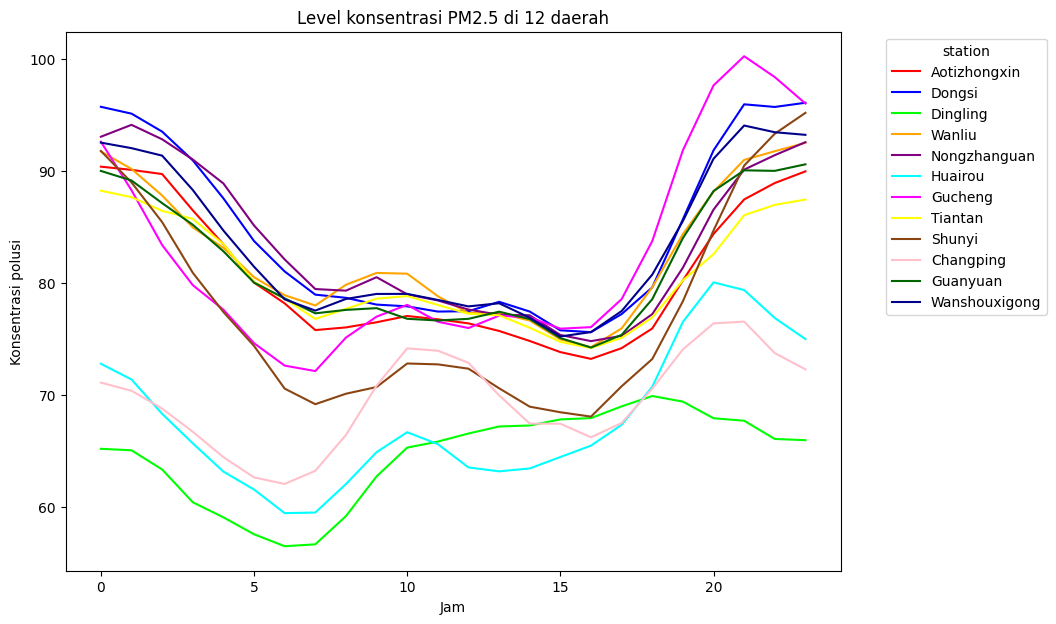

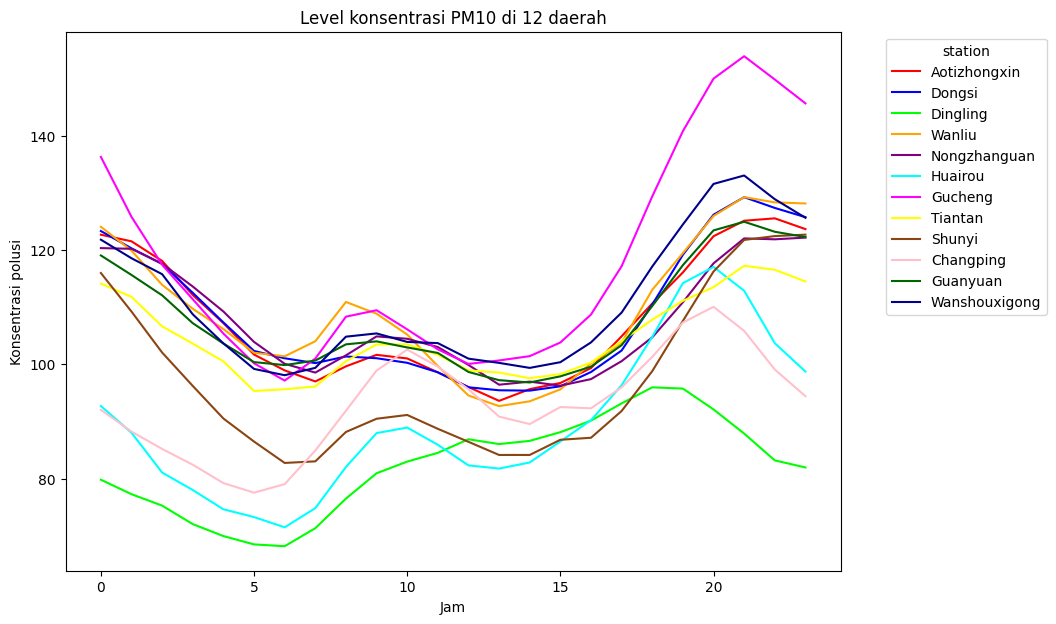

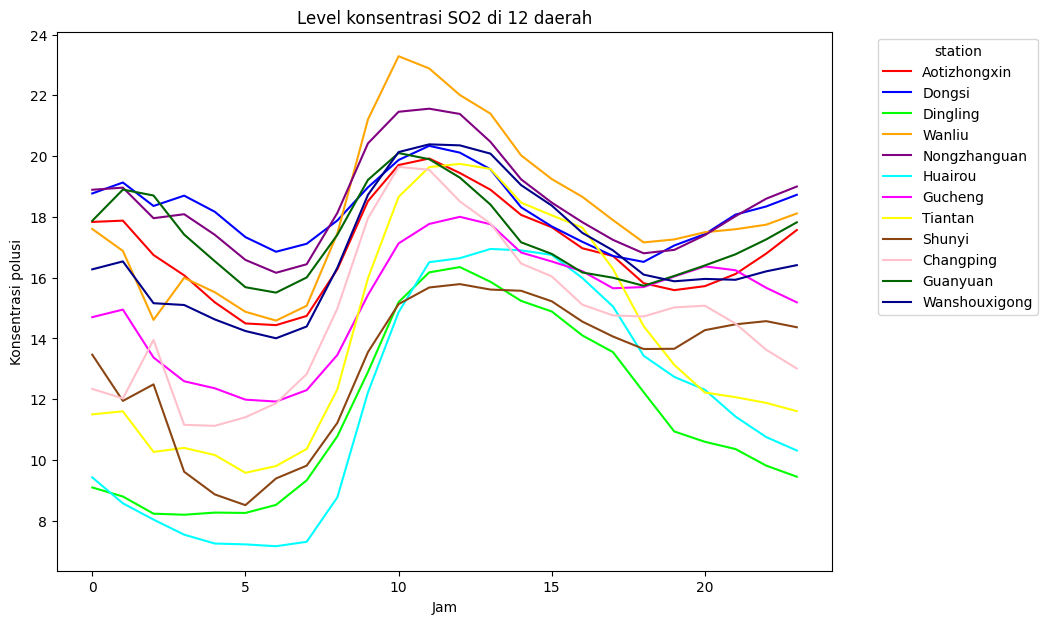

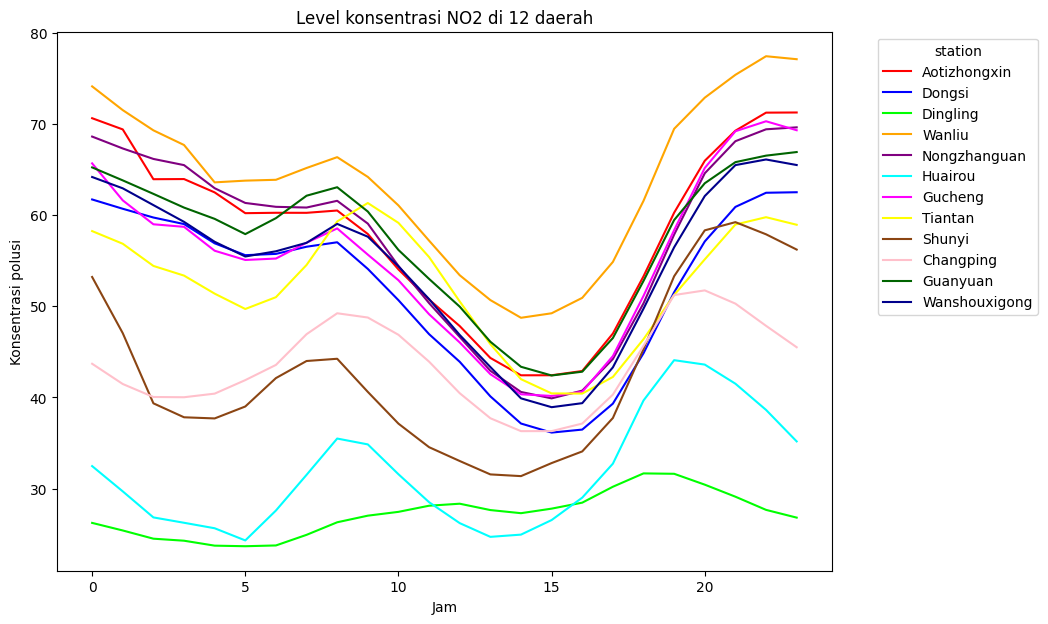

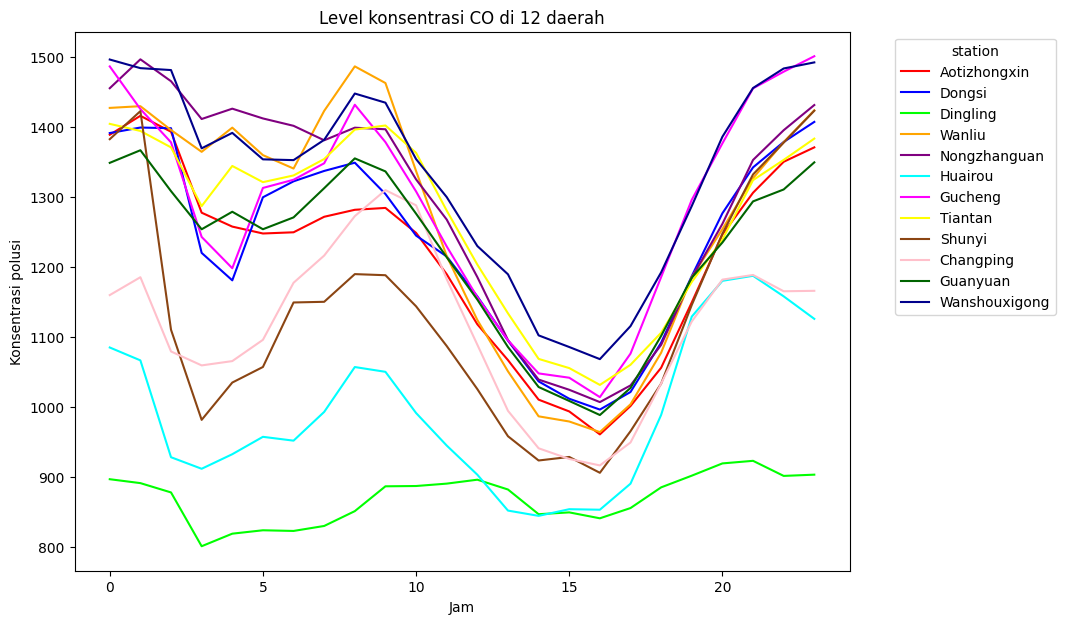

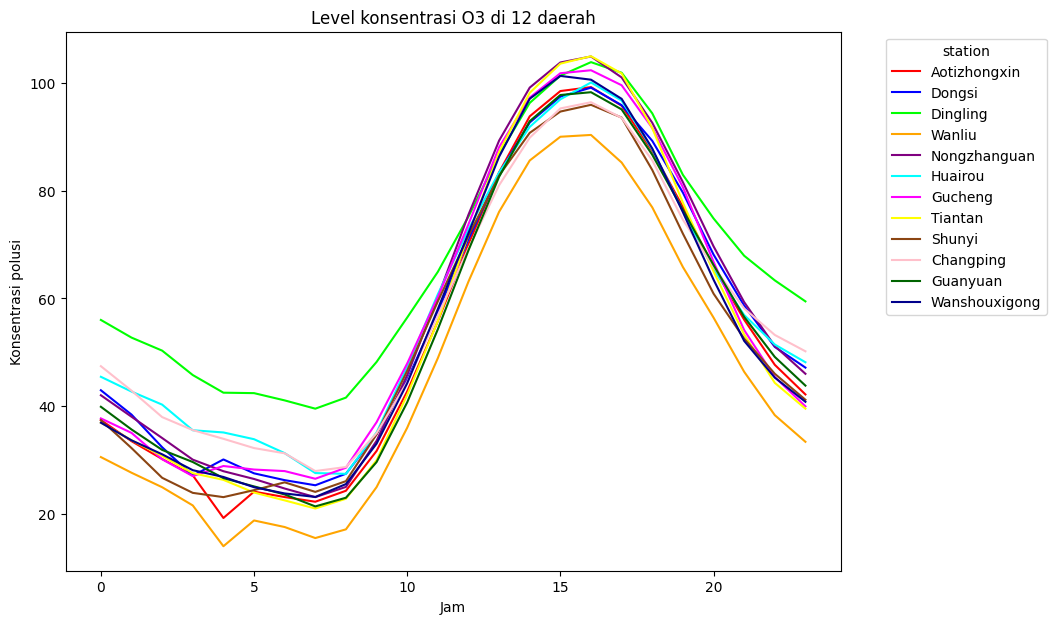

In [417]:
print("Bagaimana hasil emisi dari berbagai jenis polutan dalam satu daerah selama periode tertentu?")
print ("Hasil visualisasi data konsentrasi polutan dalam satu daerah dengan rentang waktu per jam")
for pollutant in pollutans:
  plt.figure(figsize=(10, 7))
  for i, station in enumerate(stations):
    data_station = big_df[big_df['station'] == station]
    if pollutant in data_station.columns:
      data_jam = data_station.groupby('hour')[pollutant].mean()
      plt.plot(data_jam.index, data_jam, label = station, color=colors[i % len(colors)])
  plt.title(f'Level konsentrasi {pollutant} di 12 daerah')
  plt.xlabel('Jam')
  plt.ylabel('Konsentrasi polusi')
  plt.legend(title='station', bbox_to_anchor=(1.05, 1), loc ='upper left')
  plt.show()

### Pertanyaan 2:

Bagaimana perbandingan emisi berbagai polutan di beberapa daerah selama waktu tertentu? Apakah terdapat daerah yang secara konsisten memiliki kualitas udara yang lebih baik atau lebih buruk dibandingkan daerah lain?


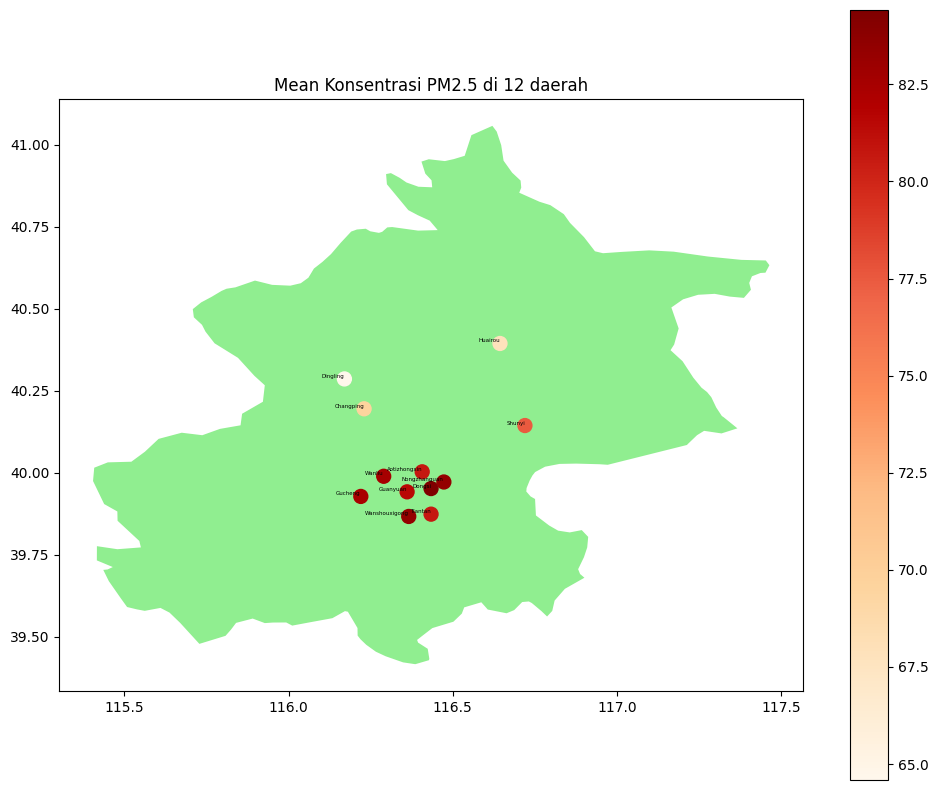

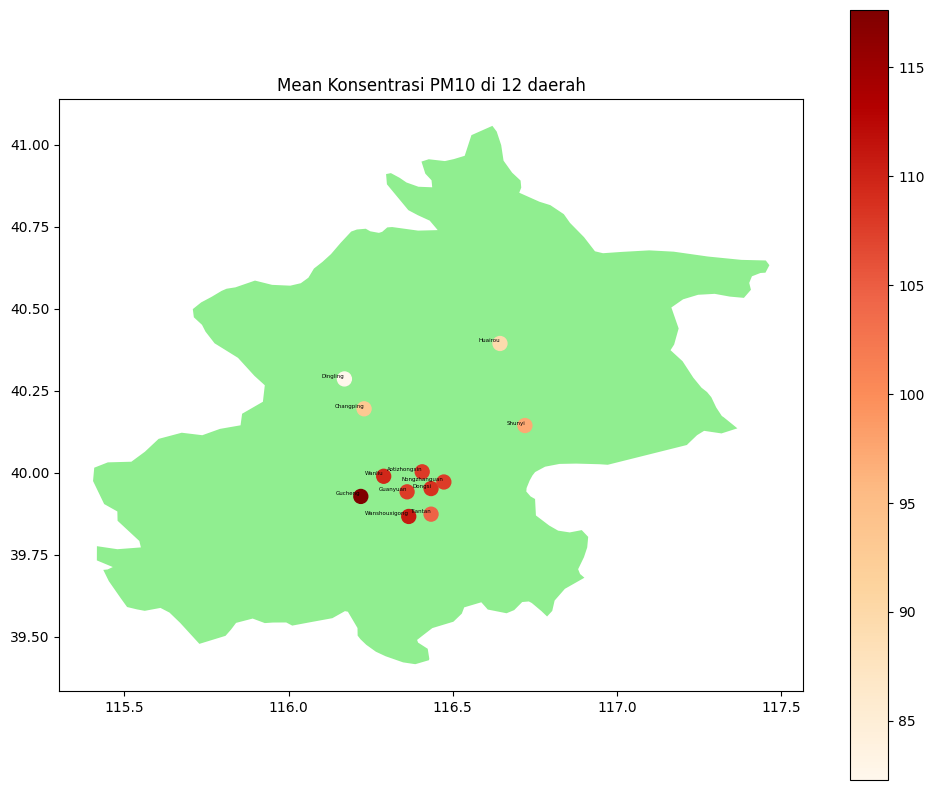

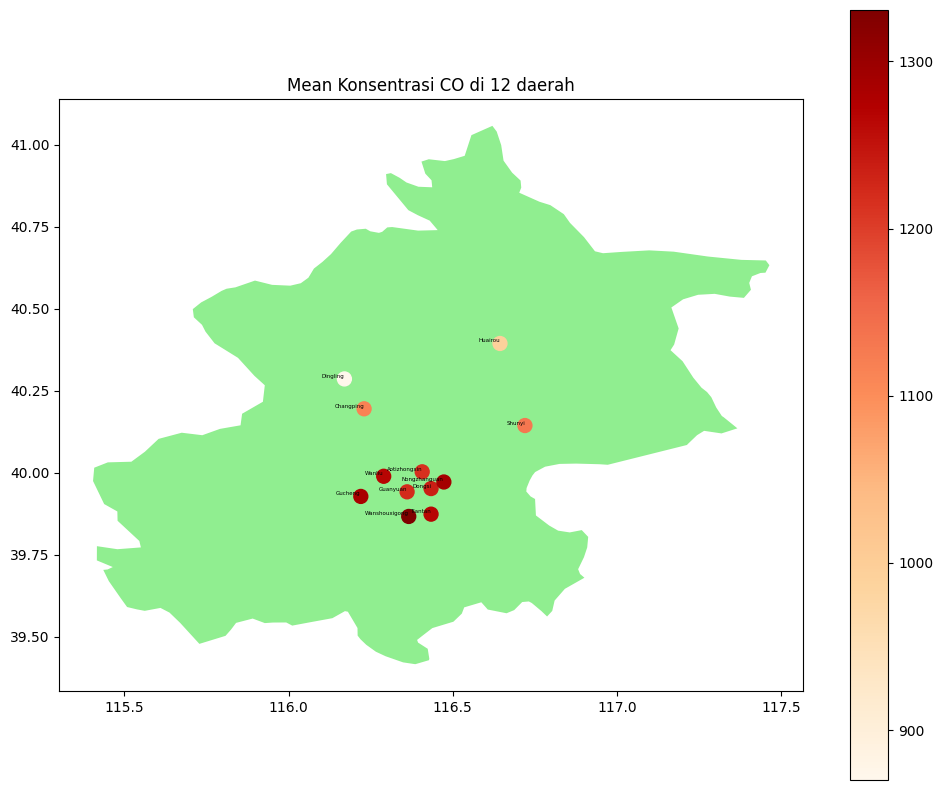

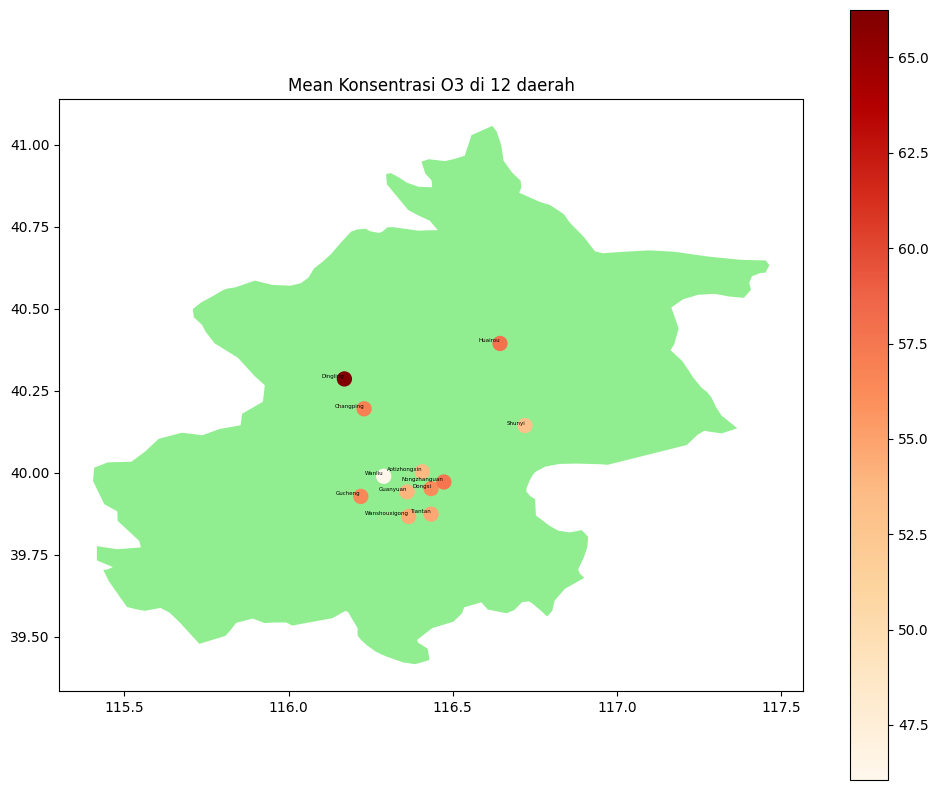

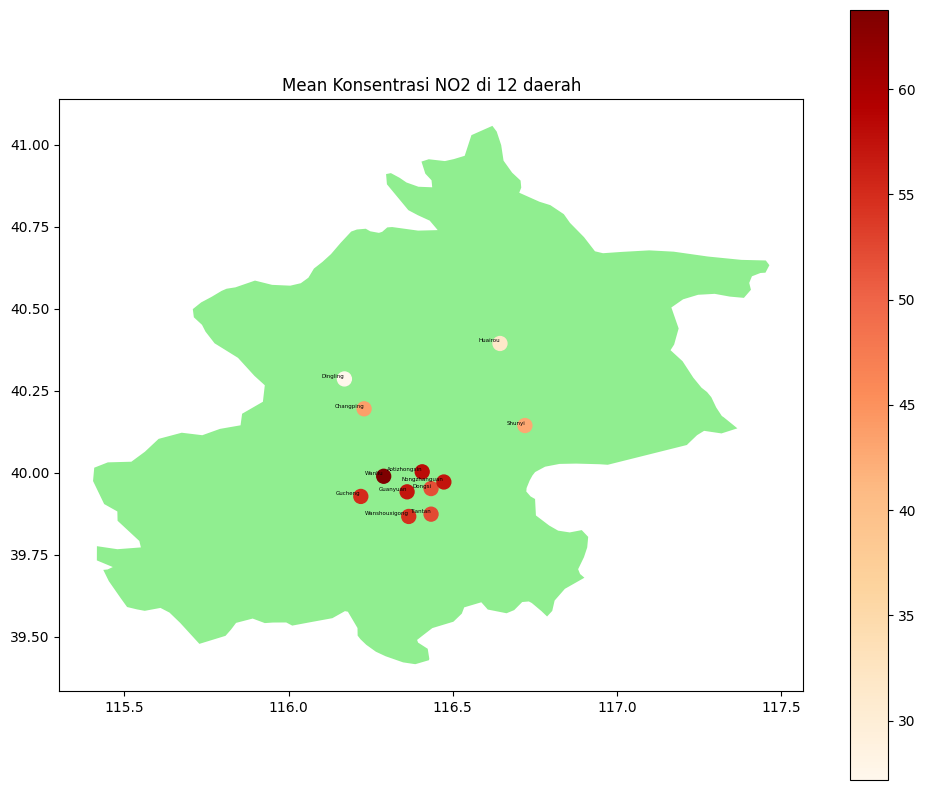

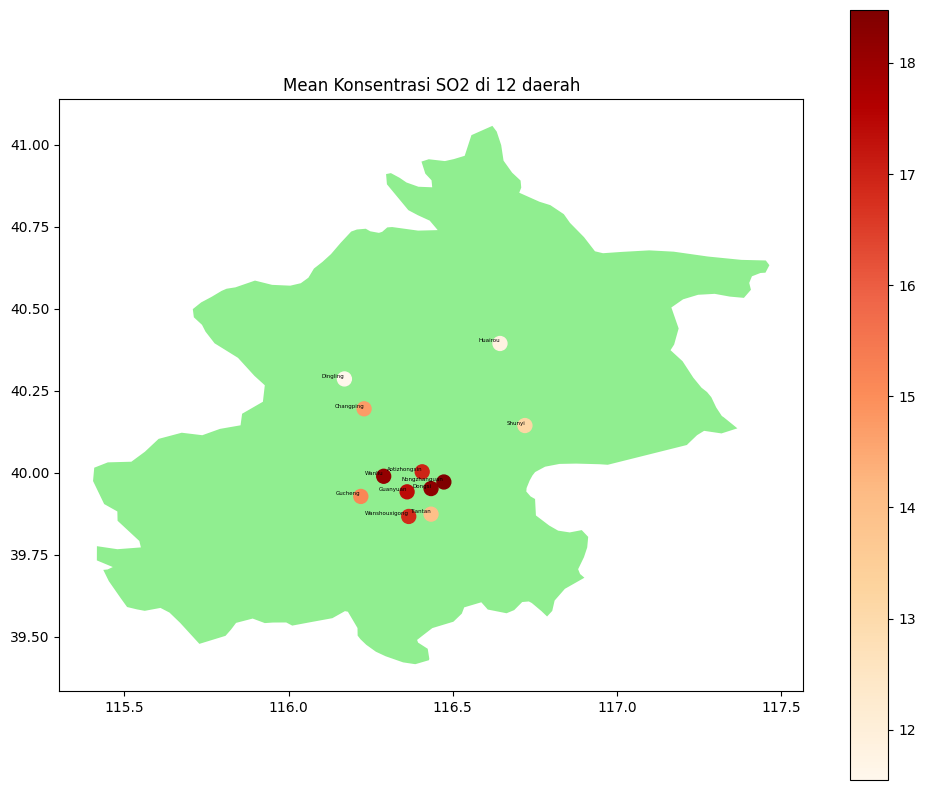

In [418]:
print("Bagaimana perbandingan emisi berbagai polutan di beberapa daerah selama waktu tertentu? Apakah terdapat daerah yang secara konsisten memiliki kualitas udara yang lebih baik atau lebih buruk dibandingkan daerah lain?")

china_data = gpd.read_file("/content/Beijing/chn_admbnda_adm1_ocha_2020.shp")
beijing_data = china_data[china_data['ADM1_EN'] == 'Beijing Municipality']

#Grafik PM2.5
mean_pm25['lat'] = mean_pm25['station'].map(lambda x: coordinates[x][0])
mean_pm25['lon'] = mean_pm25['station'].map(lambda x: coordinates [x][1])
geometry_pm25 = [Point(lon, lat) for lon, lat in zip(mean_pm25['lon'], mean_pm25['lat'])]
geo_pm25_df = gpd.GeoDataFrame(mean_pm25, geometry = geometry_pm25)
fig, ax = plt.subplots(figsize=(12, 10))
beijing_data.plot(ax=ax, color='lightgreen', linewidth=2, label='Batas')
geo_pm25_df.plot(column='PM2.5', cmap="OrRd", legend=True, ax=ax, markersize=100)
for x, y, label in zip(mean_pm25['lon'], mean_pm25['lat'], mean_pm25['station']):
  ax.text(x, y, label, fontsize = 4, ha="right", va='bottom')
ax.set_title('Mean Konsentrasi PM2.5 di 12 daerah')
plt.show()

#Grafik PM10
mean_pm10['lat'] = mean_pm10['station'].map(lambda x: coordinates[x][0])
mean_pm10['lon'] = mean_pm10['station'].map(lambda x: coordinates [x][1])
geometry_pm10 = [Point(lon, lat) for lon, lat in zip(mean_pm10['lon'], mean_pm10['lat'])]
geo_pm10_df = gpd.GeoDataFrame(mean_pm10, geometry = geometry_pm10)
fig, ax = plt.subplots(figsize=(12, 10))
beijing_data.plot(ax=ax, color='lightgreen', linewidth=2, label='Batas')
geo_pm10_df.plot(column='PM10', cmap="OrRd", legend=True, ax=ax, markersize=100)
for x, y, label in zip(mean_pm10['lon'], mean_pm10['lat'], mean_pm10['station']):
  ax.text(x, y, label, fontsize = 4, ha="right", va='bottom')
ax.set_title('Mean Konsentrasi PM10 di 12 daerah')
plt.show()

#Grafik CO
mean_co['lat'] = mean_co['station'].map(lambda x: coordinates[x][0])
mean_co['lon'] = mean_co['station'].map(lambda x: coordinates [x][1])
geometry_co = [Point(lon, lat) for lon, lat in zip(mean_co['lon'], mean_co['lat'])]
geo_co_df = gpd.GeoDataFrame(mean_co, geometry = geometry_co)
fig, ax = plt.subplots(figsize=(12, 10))
beijing_data.plot(ax=ax, color='lightgreen', linewidth=2, label='Batas')
geo_co_df.plot(column='CO', cmap="OrRd", legend=True, ax=ax, markersize=100)
for x, y, label in zip(mean_co['lon'], mean_co['lat'], mean_co['station']):
  ax.text(x, y, label, fontsize = 4, ha="right", va='bottom')
ax.set_title('Mean Konsentrasi CO di 12 daerah')
plt.show()

#Grafik O3
mean_o3['lat'] = mean_o3['station'].map(lambda x: coordinates[x][0])
mean_o3['lon'] = mean_o3['station'].map(lambda x: coordinates [x][1])
geometry_o3 = [Point(lon, lat) for lon, lat in zip(mean_o3['lon'], mean_o3['lat'])]
geo_o3_df = gpd.GeoDataFrame(mean_o3, geometry = geometry_o3)
fig, ax = plt.subplots(figsize=(12, 10))
beijing_data.plot(ax=ax, color='lightgreen', linewidth=2, label='Batas')
geo_o3_df.plot(column='O3', cmap="OrRd", legend=True, ax=ax, markersize=100)
for x, y, label in zip(mean_o3['lon'], mean_o3['lat'], mean_o3['station']):
  ax.text(x, y, label, fontsize = 4, ha="right", va='bottom')
ax.set_title('Mean Konsentrasi O3 di 12 daerah')
plt.show()

#Grafik NO2
mean_no2['lat'] = mean_no2['station'].map(lambda x: coordinates[x][0])
mean_no2['lon'] = mean_no2['station'].map(lambda x: coordinates [x][1])
geometry_no2 = [Point(lon, lat) for lon, lat in zip(mean_no2['lon'], mean_no2['lat'])]
geo_no2_df = gpd.GeoDataFrame(mean_no2, geometry = geometry_no2)
fig, ax = plt.subplots(figsize=(12, 10))
beijing_data.plot(ax=ax, color='lightgreen', linewidth=2, label='Batas')
geo_no2_df.plot(column='NO2', cmap="OrRd", legend=True, ax=ax, markersize=100)
for x, y, label in zip(mean_no2['lon'], mean_no2['lat'], mean_no2['station']):
  ax.text(x, y, label, fontsize = 4, ha="right", va='bottom')
ax.set_title('Mean Konsentrasi NO2 di 12 daerah')
plt.show()

#Grafik SO2
mean_so2['lat'] = mean_so2['station'].map(lambda x: coordinates[x][0])
mean_so2['lon'] = mean_so2['station'].map(lambda x: coordinates [x][1])
geometry_so2 = [Point(lon, lat) for lon, lat in zip(mean_so2['lon'], mean_so2['lat'])]
geo_so2_df = gpd.GeoDataFrame(mean_so2, geometry = geometry_so2)
fig, ax = plt.subplots(figsize=(12, 10))
beijing_data.plot(ax=ax, color='lightgreen', linewidth=2, label='Batas')
geo_so2_df.plot(column='SO2', cmap="OrRd", legend=True, ax=ax, markersize=100)
for x, y, label in zip(mean_so2['lon'], mean_so2['lat'], mean_so2['station']):
  ax.text(x, y, label, fontsize = 4, ha="right", va='bottom')
ax.set_title('Mean Konsentrasi SO2 di 12 daerah')
plt.show()



In [419]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Insight:**
- Grafik time series analysis dapat menjelaskan secara rinci mengenai hasil emisi dalam suatu daerah selama rentang waktu tertentu
- Grafik geospatial analysis menjelaskan secara rinci perbandingan rata-rata konsentrasi polutan pada suatu daerah

**Penjelasan**
Pada *time series analysis* untuk PM2.5, terlihat bahhwa konsentrasi PM2.5 paling tinggi terdapat di **malam hari**. Hal tersebut konsisten untuk semua daerah yang ada. Sedangkan,berdasarkan *geospatial analysis* didapati bahwa Dingling menjadi tempat dengan konsentrasi PM2.5 paling sedikit.

Pada *time series analysis* untuk PM10 terlihat bahhwa konsentrasi PM10 paling tinggi terdapat di **malam hari**. Hal tersebut konsisten untuk semua daerah yang ada. Sedangkan,berdasarkan *geospatial analysis* didapati bahwa **Dingling** menjadi tempat dengan konsentrasi PM10 paling sedikit.

Pada *time series analysis* untuk SO2 terlihat bahhwa konsentrasi SO2 paling tinggi terdapat di **pagi menjelang siang**. Hal tersebut konsisten untuk semua daerah yang ada. Sedangkan,berdasarkan *geospatial analysis* didapati bahwa **Dingling** menjadi tempat dengan konsentrasi SO2 paling sedikit.

Pada *time series analysis* untuk NO2 terlihat bahhwa konsentrasi NO2 paling tinggi terdapat di **malam hari**. Hal tersebut konsisten untuk semua daerah yang ada. Sedangkan,berdasarkan *geospatial analysis* didapati bahwa **Dingling** menjadi tempat dengan konsentrasi NO2 paling sedikit.

Pada *time series analysis* untuk CO terlihat bahhwa konsentrasi CO paling tinggi terdapat di **malam dan pagi hari**. Hal tersebut konsisten untuk semua daerah yang ada. Sedangkan,berdasarkan *geospatial analysis* didapati bahwa **Dingling** menjadi tempat dengan konsentrasi CO paling sedikit.

Pada *time series analysis* untuk O3 terlihat bahhwa konsentrasi CO paling tinggi terdapat di **sore hari**. Hal tersebut konsisten untuk semua daerah yang ada. Sedangkan,berdasarkan *geospatial analysis* didapati bahwa **Wanliu** menjadi tempat dengan konsentrasi CO paling sedikit.

**DASHBOARD**

In [420]:
big_df.to_csv("compilation_data.csv", index=False)